In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
d = pd.read_csv("crop_yield.csv")
d

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0,20.0,9.0
95,425.0,60.0,39.0,65.0,19.0,17.0,6.5
96,1220.0,79.0,28.0,77.0,23.0,21.0,10.5
97,480.0,65.0,36.0,68.0,21.0,16.0,7.0


**PREPROCESSING**

In [4]:
x = d.iloc[:,:5]
x

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P)
0,1230.0,80.0,28.0,80.0,24.0
1,480.0,60.0,36.0,70.0,20.0
2,1250.0,75.0,29.0,78.0,22.0
3,450.0,65.0,35.0,70.0,19.0
4,1200.0,80.0,27.0,79.0,22.0
...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0
95,425.0,60.0,39.0,65.0,19.0
96,1220.0,79.0,28.0,77.0,23.0
97,480.0,65.0,36.0,68.0,21.0


In [5]:
y = d.iloc[:,6]
y

0     12.0
1      8.0
2     11.0
3      9.0
4     11.0
      ... 
94     9.0
95     6.5
96    10.5
97     7.0
98    12.0
Name: Yeild (Q/acre), Length: 99, dtype: float64

**FEATURE SELECTION (FEATURE IMPORTANCE)**

In [6]:
model_fs = ExtraTreesRegressor()

In [7]:
fs = model_fs.fit(x,y)

In [8]:
fs.feature_importances_

array([0.51117276, 0.05271264, 0.30520377, 0.08598342, 0.04492741])

<Axes: >

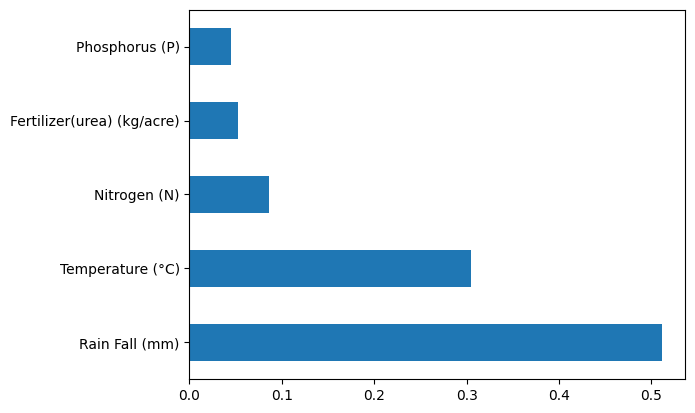

In [9]:
imp = pd.Series(fs.feature_importances_,index=x.columns)
imp.nlargest().plot(kind="barh")

*FEATURE SCALING - NO NEED AS IT IS A TREE BASED ALGORITHM*

**SPLITTING OF DATA**

In [10]:
x = x.to_numpy()
y = y.to_numpy()

In [11]:
x

array([[1230.,   80.,   28.,   80.,   24.],
       [ 480.,   60.,   36.,   70.,   20.],
       [1250.,   75.,   29.,   78.,   22.],
       [ 450.,   65.,   35.,   70.,   19.],
       [1200.,   80.,   27.,   79.,   22.],
       [ 500.,   70.,   34.,   74.,   22.],
       [1275.,   71.,   28.,   77.,   21.],
       [ 425.,   65.,   37.,   67.,   18.],
       [1200.,   77.,   27.,   78.,   23.],
       [ 400.,   50.,   39.,   60.,   18.],
       [1280.,   80.,   26.,   80.,   24.],
       [ 415.,   55.,   38.,   65.,   19.],
       [1225.,   79.,   29.,   79.,   23.],
       [ 425.,   50.,   37.,   65.,   18.],
       [1250.,   70.,   24.,   70.,   22.],
       [ 400.,   60.,   39.,   60.,   18.],
       [1300.,   80.,   28.,   80.,   24.],
       [ 410.,   55.,   36.,   65.,   21.],
       [1150.,   77.,   28.,   76.,   23.],
       [1200.,   78.,   27.,   78.,   23.],
       [ 410.,   50.,   37.,   59.,   19.],
       [1280.,   76.,   26.,   75.,   24.],
       [ 425.,   55.,   38.,   6

In [12]:
y

array([12. ,  8. , 11. ,  9. , 11. , 10. , 11. ,  7. , 12. ,  6. , 12. ,
        8. , 11. ,  9. , 11. ,  5.5, 12. ,  7. , 11. , 12. ,  6. , 11. ,
        7. , 10. ,  9. , 10. ,  6. , 12. ,  7. , 10. , 11. ,  6. , 11. ,
        7. , 10. ,  9. , 10. ,  6. , 12. ,  8. , 11. ,  7. , 11. ,  6. ,
       11. ,  7. , 11. ,  8. , 10. ,  6. , 11. ,  6. , 11. ,  6.5, 10. ,
        7.5, 11. ,  9. , 10. ,  7. , 11. ,  6.5, 11. ,  7. , 11. ,  7. ,
       11. ,  7. , 10. ,  8.5,  9.5,  7.5, 10.5,  7. , 10. ,  7.5, 12. ,
        6. , 10. ,  7.5,  9.5,  8. ,  9.5,  8.5,  9. ,  8. , 10. ,  8. ,
       11. ,  6.5, 11. ,  7. ,  9. ,  8. ,  9. ,  6.5, 10.5,  7. , 12. ])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
x_train

array([[ 450.,   50.,   37.,   60.,   18.],
       [1245.,   77.,   27.,   75.,   22.],
       [1225.,   75.,   29.,   77.,   23.],
       [ 400.,   60.,   39.,   60.,   18.],
       [ 440.,   58.,   37.,   66.,   22.],
       [ 450.,   55.,   38.,   65.,   19.],
       [ 400.,   50.,   39.,   60.,   18.],
       [ 450.,   65.,   38.,   60.,   20.],
       [ 415.,   55.,   38.,   65.,   19.],
       [ 410.,   55.,   38.,   68.,   20.],
       [1250.,   77.,   28.,   78.,   23.],
       [1150.,   80.,   26.,   75.,   21.],
       [ 405.,   55.,   36.,   60.,   21.],
       [ 410.,   52.,   40.,   62.,   19.],
       [ 500.,   70.,   34.,   74.,   22.],
       [ 460.,   55.,   38.,   61.,   20.],
       [ 455.,   60.,   38.,   65.,   20.],
       [ 500.,   50.,   37.,   65.,   18.],
       [1300.,   80.,   28.,   80.,   24.],
       [1200.,   79.,   27.,   77.,   23.],
       [1200.,   73.,   29.,   73.,   23.],
       [ 425.,   65.,   37.,   67.,   18.],
       [ 455.,   58.,   37.,   6

In [15]:
x_test

array([[1200.,   75.,   27.,   79.,   21.],
       [1275.,   78.,   28.,   77.,   23.],
       [ 425.,   60.,   39.,   65.,   19.],
       [1150.,   77.,   28.,   76.,   23.],
       [ 480.,   65.,   36.,   68.,   21.],
       [1300.,   76.,   28.,   77.,   22.],
       [1200.,   75.,   27.,   76.,   21.],
       [1175.,   78.,   28.,   75.,   23.],
       [1280.,   80.,   26.,   80.,   24.],
       [1230.,   80.,   28.,   80.,   24.],
       [ 475.,   55.,   39.,   61.,   18.],
       [1300.,   80.,   28.,   80.,   24.],
       [ 445.,   60.,   38.,   68.,   22.],
       [ 400.,   60.,   39.,   60.,   18.],
       [1250.,   80.,   26.,   78.,   23.],
       [1200.,   80.,   27.,   79.,   22.],
       [ 425.,   55.,   38.,   65.,   19.],
       [1225.,   79.,   29.,   79.,   23.],
       [1200.,   75.,   28.,   77.,   23.],
       [ 475.,   72.,   36.,   71.,   21.]])

In [16]:
y_train

array([ 6. ,  9.5, 10. ,  5.5,  8. ,  7. ,  6. ,  8. ,  8. ,  7. ,  9. ,
       11. ,  7. ,  6.5, 10. ,  7. ,  8.5,  9. , 12. , 10.5, 10. ,  7. ,
        7.5, 12. , 12. ,  9.5, 10. ,  6.5,  9. ,  9. ,  9. ,  7. , 12. ,
       12. ,  6. , 11. ,  7.5, 10. ,  7. , 11. , 12. , 10. ,  6. , 11. ,
       11. , 11. ,  7. ,  6.5, 10.5, 10. ,  7. , 10. , 10. ,  8. ,  9. ,
        7.5, 11. ,  8. ,  7. ,  7. ,  8.5,  6. , 10. ,  8. , 11. , 11. ,
       11. , 10. ,  8. , 11. , 10. , 10. ,  9.5,  6. , 11. ,  7.5, 11. ,
        9. ,  6. ])

In [17]:
y_test

array([11. , 11. ,  6.5, 11. ,  7. ,  9. , 11. , 11. , 12. , 12. ,  6. ,
       12. ,  8. ,  6. , 11. , 11. ,  7. , 11. , 11. ,  7. ])

**CHOOSING THE MODEL**

In [18]:
regressor = RandomForestRegressor()

**HYPER PARAMETER TUNING**

In [360]:
max_depth = [int(i) for i in np.linspace(1,200,50)]

In [361]:
criterion = ["squared_error", "absolute_error", "friedman_mse", "poisson"]

In [362]:
min_samples_split = [float(i) for i in np.linspace(0,1,75)]

In [363]:
min_samples_leaf = [float(i) for i in np.linspace(0,1,75)]

In [364]:
max_features = ["sqrt","log2",None]

In [365]:
bootstrap = [True,False]

In [366]:
random_grid = {"n_estimators":n_estimators,
               "criterion":criterion,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features,
              "bootstrap":bootstrap}
random_grid

{'n_estimators': [0,
  4,
  8,
  12,
  16,
  20,
  24,
  28,
  32,
  36,
  40,
  44,
  48,
  53,
  57,
  61,
  65,
  69,
  73,
  77,
  81,
  85,
  89,
  93,
  97,
  102,
  106,
  110,
  114,
  118,
  122,
  126,
  130,
  134,
  138,
  142,
  146,
  151,
  155,
  159,
  163,
  167,
  171,
  175,
  179,
  183,
  187,
  191,
  195,
  200],
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'min_samples_split': [0.0,
  0.013513513513513514,
  0.02702702702702703,
  0.04054054054054054,
  0.05405405405405406,
  0.06756756756756757,
  0.08108108108108109,
  0.0945945945945946,
  0.10810810810810811,
  0.12162162162162163,
  0.13513513513513514,
  0.14864864864864866,
  0.16216216216216217,
  0.17567567567567569,
  0.1891891891891892,
  0.20270270270270271,
  0.21621621621621623,
  0.22972972972972974,
  0.24324324324324326,
  0.2567567567567568,
  0.2702702702702703,
  0.28378378378378377,
  0.2972972972972973,
  0.31081081081081086,
  0.32432432432432434,
  0.337

In [367]:
model = RandomizedSearchCV(estimator = regressor,
                          param_distributions = random_grid,
                          scoring = "neg_mean_squared_error",
                          cv = 5,
                          verbose = 2,
                          random_state = 44,
                          n_jobs = 1)

**MAKING THE MODEL**

In [368]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, criterion=squared_error, max_features=log2, min_samples_leaf=0.0945945945945946, min_samples_split=0.43243243243243246, n_estimators=65; total time=   0.0s
[CV] END bootstrap=False, criterion=squared_error, max_features=log2, min_samples_leaf=0.0945945945945946, min_samples_split=0.43243243243243246, n_estimators=65; total time=   0.0s
[CV] END bootstrap=False, criterion=squared_error, max_features=log2, min_samples_leaf=0.0945945945945946, min_samples_split=0.43243243243243246, n_estimators=65; total time=   0.0s
[CV] END bootstrap=False, criterion=squared_error, max_features=log2, min_samples_leaf=0.0945945945945946, min_samples_split=0.43243243243243246, n_estimators=65; total time=   0.0s
[CV] END bootstrap=False, criterion=squared_error, max_features=log2, min_samples_leaf=0.0945945945945946, min_samples_split=0.43243243243243246, n_estimators=65; total time=   0.0s
[CV] END bootstrap=False, cri

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [0.0,
                                                             0.013513513513513514,
                                                             0.02702702702702703,
                                                             0.04054054054054054,
                                                             0.05405405405405406,
                                                             0.06756756756756757,
                                                             0.08...
                                                              0.28378378378378377,
                                                              0.2972972972972973,
                                                              0.31081081081081086,
                                                              0.32432432432432434,
                                                              0.33783783783783783,
                                                              0.35135135135135137,
                                                              0.3648648648648649,
                                                              0.3783783783783784,
                                                              0.3918918918918919, ...],
                                        'n_estimators': [0, 4, 8, 12, 16, 20,
                                                         24, 28, 32, 36, 40, 44,
                                                         48, 53, 57, 61, 65, 69,
                                                         73, 77, 81, 85, 89, 93,
                                                         97, 102, 106, 110, 114,
                                                         118, ...]},
                   random_state=44, scoring='neg_mean_squared_error',
                   verbose=2)

In [369]:
model.best_params_

{'n_estimators': 191,
 'min_samples_split': 0.05405405405405406,
 'min_samples_leaf': 0.013513513513513514,
 'max_features': None,
 'criterion': 'friedman_mse',
 'bootstrap': True}

**TESTING THE MODEL**

In [370]:
y_test

array([11. , 11. ,  6.5, 11. ,  7. ,  9. , 11. , 11. , 12. , 12. ,  6. ,
       12. ,  8. ,  6. , 11. , 11. ,  7. , 11. , 11. ,  7. ])

In [371]:
y_pred = model.predict(x_test)
y_pred

array([10.97138494, 10.23311726,  6.60497552, 10.13779191,  8.185658  ,
       10.53687775, 10.70276531, 10.36748733, 11.66577641, 11.69644208,
        6.97594466, 11.70121021,  7.96063619,  5.96902977, 11.14255504,
       11.10688108,  7.31034636, 10.24577412, 10.53410205,  8.29622289])

In [372]:
df = pd.DataFrame({"Actual value":y_test,"Predicted value":y_pred})
df

,Actual value,Predicted value
0,11.0,10.971385
1,11.0,10.233117
2,6.5,6.604976
3,11.0,10.137792
4,7.0,8.185658
5,9.0,10.536878
6,11.0,10.702765
7,11.0,10.367487
8,12.0,11.665776
9,12.0,11.696442


<Axes: title={'center': 'Feature-correlation (pearson)'}>

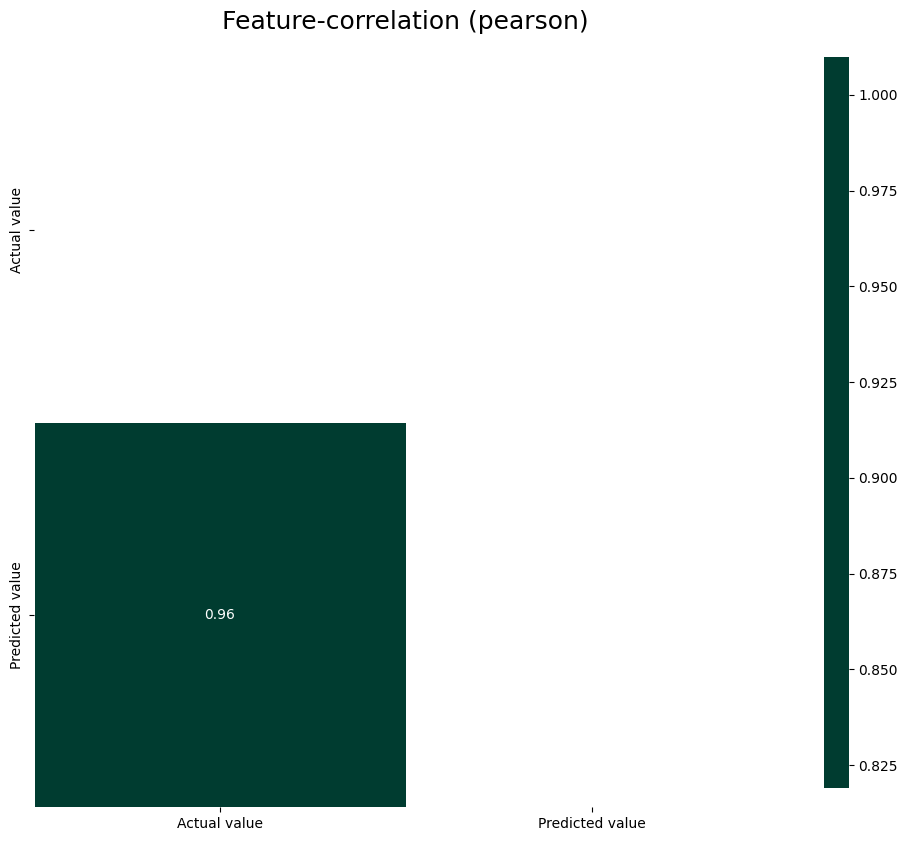

In [373]:
klib.corr_plot(df)

<Axes: >

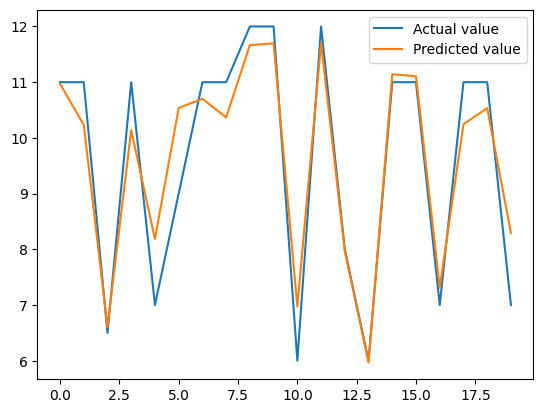

In [374]:
df.plot()

**PERFORMANCE METRICS**

In [375]:
mean_squared_error(y_test,y_pred)

0.47209129943554684

In [376]:
mean_absolute_error(y_test,y_pred)

0.5236971859583122

In [377]:
model.score(x_test,y_test)

-0.47209129943554684

In [378]:
r2_score(y_test,y_pred)

0.8991661888804066